## 1. Capas Embedding en Keras

[Embedding Layers](https://keras.io/layers/embeddings/) 

In [10]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense

Vamos a implementar una red neuronal que clasifique reviews de restaurantes en positivas o negativas.

In [11]:
# Defino 10 reviews de un restaurante
reviews = [
    'No vayáis nunca!',
    'Servicio horrible',
    'Camareros maleducados',
    'Comida fría',
    'Comida asquerosa!',
    'Impresionante',
    'Servicio impresionante!',
    'Mola!',
    'muy pobre',
    'No han podido hacerlo mejor'
]

# Definir etiquetas (1=negativo, 0=positivo)
labels = array([1,1,1,1,1,0,0,0,1,0])

Fíjate que una de las etiquetas es incorrecta. Esto suele ocurrir, y generalmente encontramos ruido en los datos de entrenamiento.  

Definimos un vocabulario de 50 palabras (aunque no tengamos 50, es conveniente usar un valor algo mayor que el necesario). Para la entrada, utilizamos one-hot-encoding de los textos. 

In [12]:
VOCAB_SIZE = 50
encoded_reviews = [one_hot(d,VOCAB_SIZE) for d in reviews]
print("Encoded reviews:", encoded_reviews)

Encoded reviews: [[3, 13, 9], [29, 41], [33, 27], [20, 36], [20, 49], [43], [29, 43], [36], [30, 43], [3, 45, 45, 43, 20]]


Necesitamos hacer un padding para que los vectores tengan la misma longitud. Utilizamos un pad de 4 palabras y eliminamos las que superen la cuarta palabra

In [13]:
MAX_LENGTH = 4
padded_reviews = pad_sequences(encoded_reviews, maxlen=MAX_LENGTH, padding='post')
print(padded_reviews)

[[ 3 13  9  0]
 [29 41  0  0]
 [33 27  0  0]
 [20 36  0  0]
 [20 49  0  0]
 [43  0  0  0]
 [29 43  0  0]
 [36  0  0  0]
 [30 43  0  0]
 [45 45 43 20]]


Vamos a crear una red neuronal para clasificar las reviews

In [14]:
model = Sequential()
embedding_layer = Embedding(input_dim=VOCAB_SIZE, output_dim=8, input_length=MAX_LENGTH)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              400       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


La primera capa convierte los 4 índices de las reviews en 4 vectores de dimensión 8
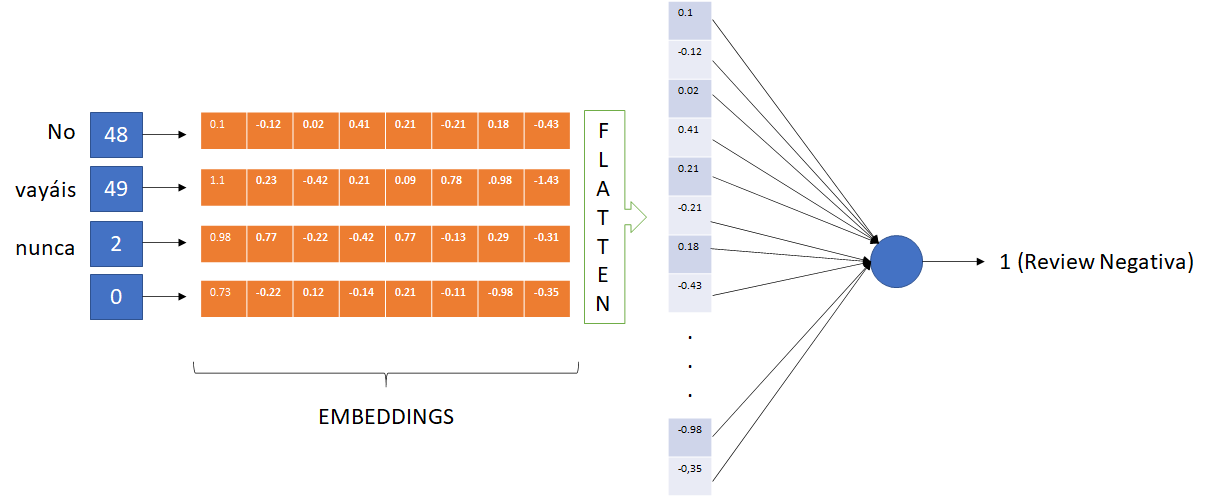

In [15]:
model.fit(padded_reviews, labels, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 382ms/step - loss: 0.6940 - acc: 0.4000
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6921 - acc: 0.6000
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6903 - acc: 0.7000
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6885 - acc: 0.7000
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6867 - acc: 0.7000
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6849 - acc: 0.7000
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6831 - acc: 0.7000
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6814 - acc: 0.7000
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6796 - acc: 0.7000
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6778 - acc: 0.7000
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 0.676

Con esto podemos ver los embeddings que la red ha aprendido. Cada vector asociado a una palabra se encuentra en un espacio de 8 dimensiones en el que las palabras asociadas con reviews positivas están más cerca entre ellas, así como las negativas también están más próximas entre sí.  
Además, las capa densa permite transformar estos embeddings a predicciones

In [16]:
print(embedding_layer.get_weights()[0].shape)

(50, 8)


In [17]:
print(one_hot('No', VOCAB_SIZE)[0])
embedding_layer.get_weights()[0][32]

3


array([ 0.02402714, -0.03738145, -0.01926097, -0.01067369, -0.02681928,
       -0.02919749, -0.03027203, -0.04365257], dtype=float32)

Podemos medir el accuracy de la red, incluyendo los embeddings y la capa densa

In [18]:
loss, accuracy = model.evaluate(padded_reviews, labels)
loss, accuracy

1/1 [==============================] - 0s 120ms/step - loss: 0.4986 - acc: 0.9000


(0.4985537528991699, 0.8999999761581421)

Aunque el accuracy sea 1 (indicando que probablemente haya overfitting), la función de coste no es cero, lo cual indica que a pesar de que las probabilidades que predice el modelo indican una correcta predicción, la red no consigue una confianza absoluta en cada respuesta. 

In [19]:
new_review = 'No volveré nunca'
new = [one_hot(new_review,VOCAB_SIZE)]
new2 = pad_sequences(new, maxlen=MAX_LENGTH, padding='post')
model.predict(new2)

1/1 [==============================] - 0s 62ms/step


array([[0.66311246]], dtype=float32)

In [20]:
new_review = 'volveria a repetir'
new = [one_hot(new_review,VOCAB_SIZE)]
new2 = pad_sequences(new, maxlen=MAX_LENGTH, padding='post')
model.predict(new2)

1/1 [==============================] - 0s 17ms/step


array([[0.5309632]], dtype=float32)

**Do it yourself**: Calcula las distancias de los siguientes pares de palabras a través de sus embeddings:  

1) horrible - maleducados  
2) horrible - impresionante

In [21]:
horrible = one_hot('horrible',VOCAB_SIZE)[0]
maleducados =  one_hot('maleducados',VOCAB_SIZE)[0]
impresionante =  one_hot('impresionante',VOCAB_SIZE)[0]

print(horrible, maleducados, impresionante)

41 27 43


In [22]:
# Horrible - maleducados
import numpy as np

emb1 = embedding_layer.get_weights()[0][horrible]
emb2 = embedding_layer.get_weights()[0][maleducados]

d1 = np.linalg.norm(emb1-emb2)
d1

0.105406106

In [23]:
emb1, emb2

(array([ 0.14839244, -0.06971508,  0.05681102, -0.11229111,  0.09298006,
        -0.12077306,  0.08662948, -0.10534108], dtype=float32),
 array([ 0.06885232, -0.09309699,  0.11263657, -0.09541434,  0.07519095,
        -0.1421813 ,  0.08078311, -0.10016039], dtype=float32))

In [24]:
# Horrible - impresionante: 0.39
emb1 = embedding_layer.get_weights()[0][horrible]
emb2 = embedding_layer.get_weights()[0][impresionante]

d2 = np.linalg.norm(emb1-emb2)
d2

0.3722357

## 2. Word2Vec

Word2Vec es una de las técnicas más populares de embeddings en palabras. Utiliza como entrada un "corpus" de texto y su salida es un conjunto de vectores. Es capaz de capturar el significado de una palabra en un documento, su similitud semántica y sintáctica y la relación de las palabras entre sí

La librería Gensim nos permite utilizar el embedding de Word2Vec.  
En este ejemplo vamos a hacer web scraping de un [artículo](https://en.wikipedia.org/wiki/Artificial_intelligence) de Wikipedia para tener un corpus de texto

In [35]:
import bs4 as bs
import urllib.request
import re

scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
article = scrapped_data.read()

parsed_article = bs.BeautifulSoup(article,'html.parser')
paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text
    
# Limpieza    
processed_article = article_text.lower()
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )
processed_article = re.sub(r'\s+', ' ', processed_article)

print(processed_article)

 artificial intelligence ai is the intelligence of machines or software as opposed to the intelligence of humans or animals it is a field of study in computer science which develops and studies intelligent machines such machines may be called ais ai technology is widely used throughout industry government and science some high profile applications are advanced web search engines e g google search recommendation systems used by youtube amazon and netflix understanding human speech such as google assistant siri and alexa self driving cars e g waymo generative and creative tools chatgpt and ai art and superhuman play and analysis in strategy games such as chess and go alan turing was the first person to carry out substantial research in the field that he called machine intelligence artificial intelligence was founded as an academic discipline in the field went through multiple cycles of optimism followed by disappointment and loss of funding funding and interest vastly increased after whe

En el código anterior, convertimos el texto del artículo a minúsculas y eliminamos los dígitos y caracteres especiales, quedándonos únicamente con las palabras.   

El modelo Word2Vec se entrena con una colección de palabras. En primer lugar, necesitamos convertir nuestro artículo en frases, para lo cual utilizamos `nltk.sent_tokenize`. Para convertir frases en palabras, usaremos `nltk.word_tokenize`. Por último, eliminamos las palabras sin significado (*stop words*) del texto

In [ ]:
# !pip install nltk

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\botic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\botic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
all_sentences = nltk.sent_tokenize(processed_article)
all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

# Quitar stop words
from nltk.corpus import stopwords
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [37]:
len(all_words[0])

5842

Con la librería Gensim podemos implementar un modelo Word2Vec. La lista de palabras se utiliza como entrada, pudiendo especificar el número mínimo de veces que cada palabra tiene que aparecer para que sea tomada en consideración.

In [ ]:
#!pip install gensim

In [39]:
all_words = [[w for w in all_words[0] if len(w) > 1]]

In [40]:
from gensim.models import Word2Vec
word2vec = Word2Vec(all_words,min_count=2)

Podemos ver el diccionaro de palabras

In [41]:
vocabulary = word2vec.wv.key_to_index
print(vocabulary)

{'ai': 0, 'intelligence': 1, 'learning': 2, 'machine': 3, 'artificial': 4, 'used': 5, 'human': 6, 'research': 7, 'many': 8, 'use': 9, 'problems': 10, 'knowledge': 11, 'data': 12, 'networks': 13, 'may': 14, 'neural': 15, 'problem': 16, 'search': 17, 'including': 18, 'researchers': 19, 'field': 20, 'deep': 21, 'computer': 22, 'also': 23, 'applications': 24, 'could': 25, 'reasoning': 26, 'using': 27, 'machines': 28, 'general': 29, 'turing': 30, 'make': 31, 'example': 32, 'possible': 33, 'systems': 34, 'information': 35, 'agent': 36, 'decision': 37, 'solve': 38, 'people': 39, 'however': 40, 'mind': 41, 'large': 42, 'programs': 43, 'system': 44, 'would': 45, 'technology': 46, 'based': 47, 'risk': 48, 'first': 49, 'algorithms': 50, 'program': 51, 'intelligent': 52, 'several': 53, 'two': 54, 'world': 55, 'called': 56, 'theory': 57, 'specific': 58, 'risks': 59, 'input': 60, 'real': 61, 'recognition': 62, 'logic': 63, 'decisions': 64, 'symbolic': 65, 'early': 66, 'humans': 67, 'goals': 68, 'dev

Veamos cuál es la representación vectorial de la palabra "artificial"

In [42]:
v1 = word2vec.wv['artificial']
print(len(v1))
v1

100


array([-9.5523894e-03,  6.4068339e-03, -5.4604695e-03, -2.0606499e-03,
        4.9943477e-03, -3.5771690e-03,  4.8363395e-03,  1.6504511e-02,
       -8.6713769e-03,  4.5102071e-03, -8.6294049e-03, -3.5127744e-03,
       -1.0375306e-02,  5.0778105e-03, -4.7570579e-03, -7.6622642e-03,
       -1.8875122e-03,  4.7076328e-04,  6.4618862e-03, -1.6343702e-02,
        5.1247510e-03, -5.7695592e-03,  1.0337273e-02,  6.3456600e-03,
       -6.0504666e-03,  7.7963300e-04, -3.8637416e-03, -3.0339477e-04,
       -1.1220230e-02,  1.0629823e-03,  1.3009125e-02,  4.2434041e-03,
        3.1591537e-03, -1.1496431e-02,  5.1851454e-03, -4.2091904e-04,
       -6.0024140e-03, -1.7856542e-03, -5.6176055e-03, -1.0460645e-02,
        2.0041959e-03, -1.0837377e-02, -1.1299114e-02,  7.5813639e-03,
        9.9076759e-03, -9.0361554e-03, -1.0804941e-03, -5.5338192e-04,
        7.6958314e-03, -2.9245296e-03,  6.8885162e-03,  8.9346501e-04,
        7.6999045e-03, -3.4778023e-03, -4.3628993e-03, -5.7518990e-03,
      

Podemos buscar palabras similares a una dada

In [43]:
sim_words = word2vec.wv.most_similar('artificial')
sim_words

[('ai', 0.5237063765525818),
 ('learning', 0.5184969305992126),
 ('reasoning', 0.5093240141868591),
 ('used', 0.48482364416122437),
 ('networks', 0.4778633713722229),
 ('turing', 0.4724794924259186),
 ('human', 0.447722852230072),
 ('data', 0.4471662640571594),
 ('recognition', 0.44602686166763306),
 ('early', 0.43369078636169434)]